<a href="https://colab.research.google.com/github/Priyambada-singh01/ChatGPT-Analysis-/blob/main/Chatgpt_Customer_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Prepration**

In [ ]:
!pip install swifter # for parallel processing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16505 sha256=3eabe1997dbb6564ae643f4220fddf31238593bebea2a2408c9cb98a01df7f86
  Stored in directory: /root/.cache/pip/wheels/ef/7f/bd/9bed48f078f3ee1fa75e0b29b6e0335ce1cb03a38d3443b3a3
Successfully built swifter


In [ ]:
import pandas as pd
data = pd.read_csv('https://statso.io/wp-content/uploads/2024/08/chatgpt_reviews.csv')

In [ ]:
data.head()

,Review Id,Review,Ratings,Review Date
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:50
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:39


In [ ]:
data.info() #To check to statistics of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196727 entries, 0 to 196726
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Review Id    196727 non-null  object
 1   Review       196721 non-null  object
 2   Ratings      196727 non-null  int64 
 3   Review Date  196727 non-null  object
dtypes: int64(1), object(3)
memory usage: 6.0+ MB


In [ ]:
# Standardize Column Names
data.columns = (
    data.columns
    .str.strip()              # Remove leading/trailing spaces
    .str.lower()              # Convert to lowercase
    .str.replace(' ', '_')    # Replace spaces with underscores
    .str.replace('[^a-z0-9_]', '', regex=True)  # Remove special characters
)

In [ ]:
data.columns

Index(['review_id', 'review', 'ratings', 'review_date'], dtype='object')

In [ ]:
print(data.isnull().sum())

review_id      0
review         6
ratings        0
review_date    0
dtype: int64


In [ ]:
data.dropna(inplace=True)

In [ ]:
print(data.isnull().sum())

review_id      0
review         0
ratings        0
review_date    0
dtype: int64


In [ ]:
len(data)

196721

In [ ]:
data.describe()

,ratings
count,196721.000000
mean,4.503581
std,1.082932
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
data['review_date'] = pd.to_datetime(data['review_date'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196721 entries, 0 to 196726
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   review_id    196721 non-null  object        
 1   review       196721 non-null  object        
 2   ratings      196721 non-null  int64         
 3   review_date  196721 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 7.5+ MB


# **Sentiment Analysis**

In [ ]:
from textblob import TextBlob
import swifter
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# This analyze the sentiment of the feedback review
# polarity tells how to user feels about the product i,e good or bad
def analyze_sentiment_polarity(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'


In [ ]:
# Subjectivity tells you whether users are sharing factual statements or personal opinions.
def analyze_sentiment_subjectivity(text):
    analysis = TextBlob(text)
    if analysis.sentiment.subjectivity> 0:
        return 'Factual'
    elif analysis.sentiment.subjectivity< 0:
        return 'Opinion'
    else:
        return 'Neutral'

In [ ]:
data['polarity'] = data['review'].swifter.apply(analyze_sentiment_polarity)
data['subjectivity'] = data['review'].swifter.apply(analyze_sentiment_subjectivity)

Pandas Apply:   0%|          | 0/196721 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/196721 [00:00<?, ?it/s]

In [ ]:
data.head()

,review_id,review,ratings,review_date,polarity,subjectivity
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05,Positive,Factual
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18,Positive,Factual
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59,Positive,Factual
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:50,Positive,Factual
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:39,Positive,Factual


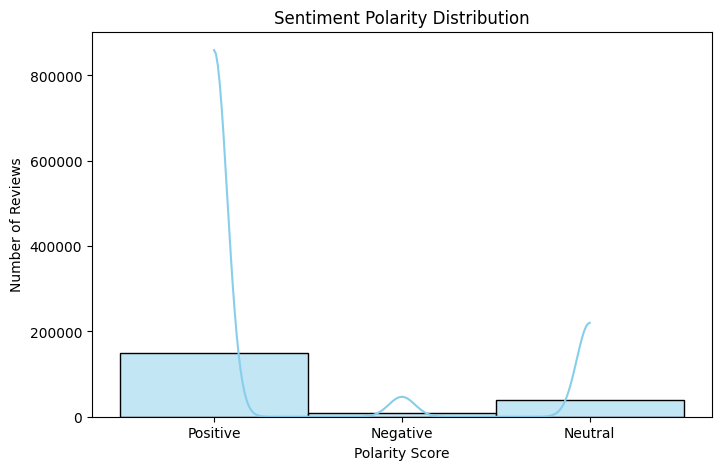

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data['polarity'], bins=10, kde=True, color='skyblue')
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Polarity Score')
plt.ylabel('Number of Reviews')
plt.show()


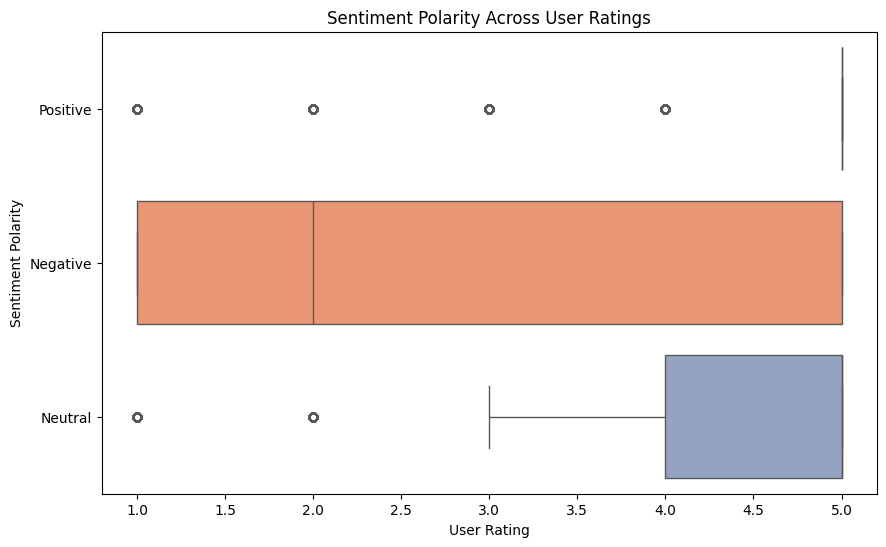

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ratings', y='polarity', data=data, palette='Set2')
plt.title('Sentiment Polarity Across User Ratings')
plt.xlabel('User Rating')
plt.ylabel('Sentiment Polarity')
plt.show()

<Figure size 800x500 with 0 Axes>

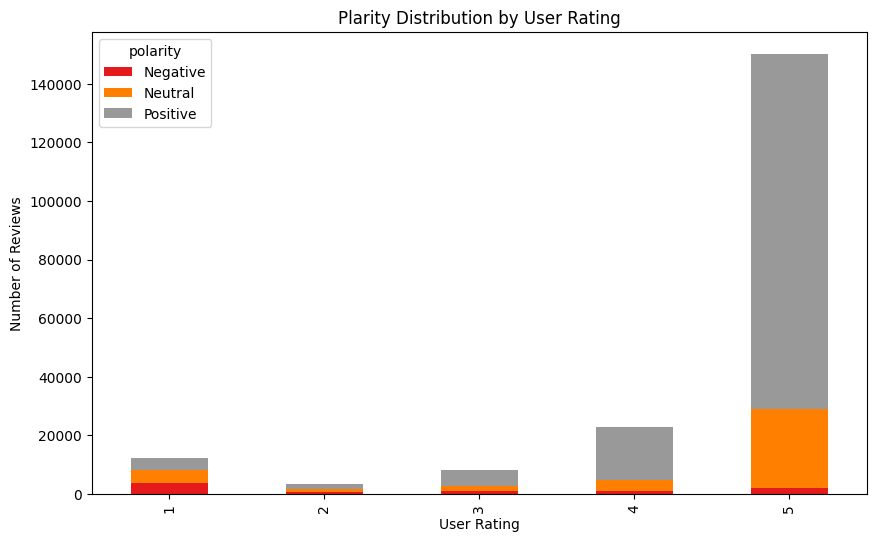

In [ ]:
plt.figure(figsize=(8, 5))
polarity_count = data.groupby('ratings')['polarity'].value_counts().unstack()
polarity_count.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set1')
plt.title('Plarity Distribution by User Rating')
plt.xlabel('User Rating')
plt.ylabel('Number of Reviews')
plt.show()
